## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('../Notebooks_and_Data/DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

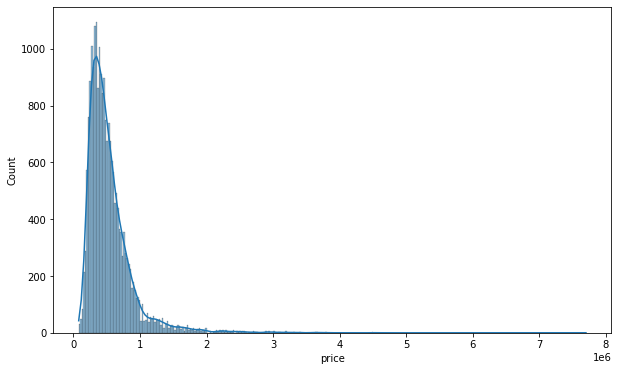

In [17]:
# distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde = True)
plt.show();

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

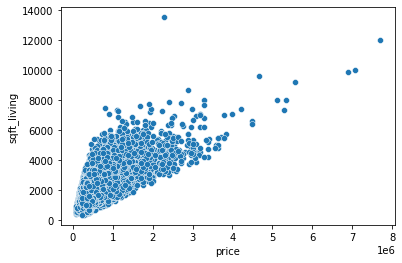

In [10]:
sns.scatterplot(x = 'price', y ='sqft_living', data = df)

<AxesSubplot:>

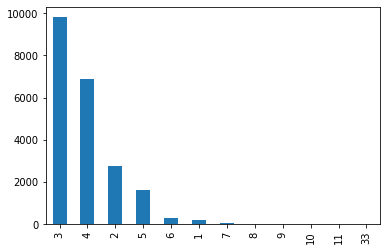

In [15]:
df['bedrooms'].value_counts().plot.bar()

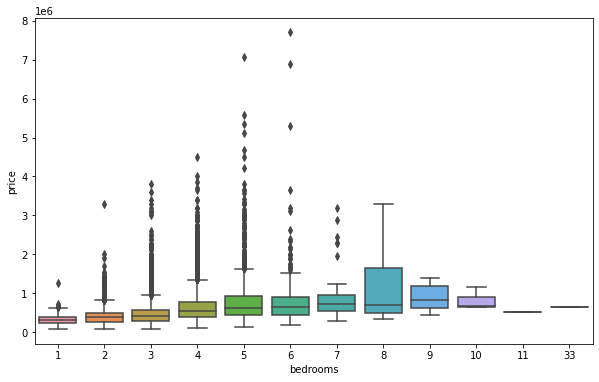

In [20]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
plt.show();

### Geographical Properties

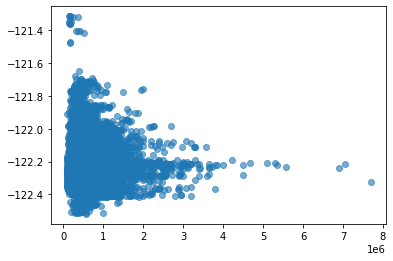

In [23]:
plt.scatter(df['price'], df['long'], alpha = 0.6)

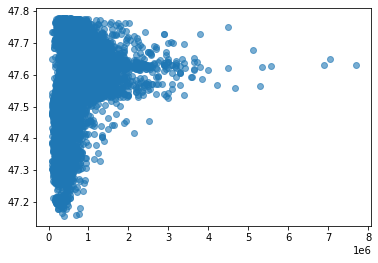

In [24]:
plt.scatter(df['price'], df['lat'], alpha = 0.6)

- We can see a major disributions around -122 longitude and 47.6 latitude
- Lets try plotting the long and lat and check 

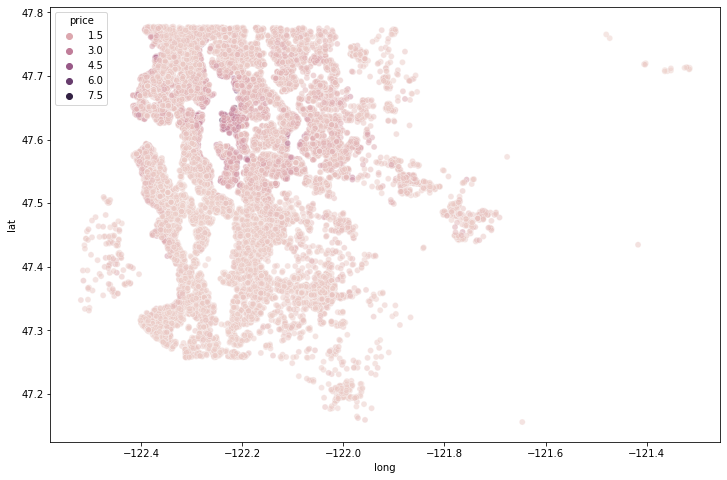

In [27]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, alpha = 0.5, hue = 'price')
plt.show();

- As expected, there is kind of more higher price houses around these long and lat values.
- Due to some outlier values, we cannot see more detailed distributions
- Lets try to remove these outliers and check

In [29]:
# top 20 expensive homes.
df['price'].sort_values(ascending = False).head(20)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
Name: price, dtype: float64

In [47]:
# lets try removing these top 1% costliest homes and see
top_1_perc_costliest = df.iloc[(df['price'].sort_values(ascending = False)).index][200:][:]
top_1_perc_costliest

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15025,2726049034,11/10/2014,2000000.0,3,3.25,2610,16387,2.0,1,4,...,9,2610,0,2006,0,98125,47.7175,-122.278,2590,12958
19200,4131900042,5/16/2014,2000000.0,5,4.25,6490,10862,2.0,0,3,...,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
6685,2624089007,3/20/2015,2000000.0,2,2.50,3900,920423,2.0,0,0,...,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
10457,1732800310,3/2/2015,2000000.0,4,3.75,2870,4500,2.0,0,3,...,10,2510,360,2012,0,98119,47.6291,-122.363,2870,6354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [48]:
top_1_perc_costliest.shape

(21397, 21)

In [45]:
df.shape

(21597, 21)

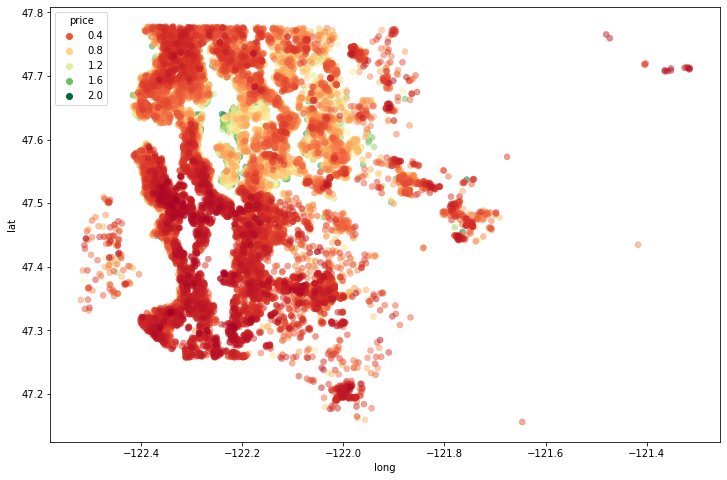

In [51]:
# replot the same for these data
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = top_1_perc_costliest, alpha = 0.5, hue = 'price',
               edgecolor = None, palette= 'RdYlGn')
plt.show();

- Now, we can see better, waterfront houses are more costlier than the inland house in general as we can see more yellow and green spots aroud the waterfront areas in and around 47.7 lat and -122.2 longitude values

In [52]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

0    21434
1      163
Name: waterfront, dtype: int64


<AxesSubplot:xlabel='waterfront', ylabel='price'>

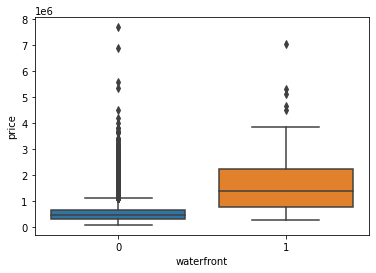

In [55]:
## check waterfront prices
print(df['waterfront'].value_counts())

sns.boxplot(x = 'waterfront', y = 'price', data = df)

In [56]:
## removing the columns that we will not use --
# Here id will not contribute in our prediction so removing it
# zipcode - we are removing because it has 70 unique values and doing analysis based on zipcode will take much longer time
# for time sake we are removing zipcode as well
df.drop(['id', 'zipcode'], axis = 1, inplace=True)

In [57]:
# converting date feature into datetime data
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [59]:
# convert to date time object
df['date'] = pd.to_datetime(df['date'])

In [61]:
# now we can create month and year columns
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [62]:
# above lambda function is same as 
def get_year(date):
    return date.year

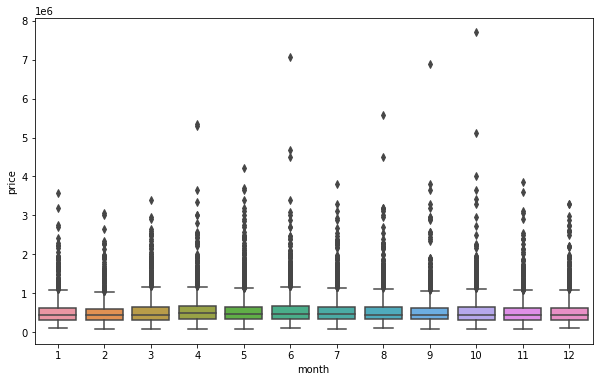

In [63]:
# lets do some eda on month, if there is any change in price w.r.t month of the year

plt.figure(figsize= (10, 6))
sns.boxplot(x='month', y = 'price', data = df)
plt.show();

In [64]:
# can't see much difference , so lets group the month and check the mean price
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

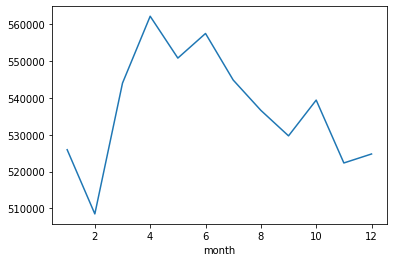

In [65]:
# plot
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

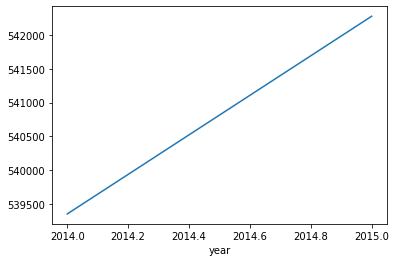

In [67]:
# plot for year
df.groupby('year').mean()['price'].plot()

- Can see a little up in and around summer, but the range seems to be narrow
- make sense for year, as the price goes up as the year passes

In [66]:
# now we also dont need the date feature for now, removing it
df.drop('date', axis = 1, inplace = True)

In [68]:
## Split the data
from sklearn.model_selection import train_test_split

In [69]:
# converting into np arrays so that tensorflow doesnt have any issue
X = df.drop('price', axis = 1).values
y = df['price'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train.shape, X_test.shape

((15117, 19), (6480, 19))

### Scaling and Training

In [71]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
# scaling
scaler = MinMaxScaler()

In [73]:
scaler.fit(X_train)

MinMaxScaler()

In [74]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
# initialize model

model = Sequential()

# add layers
model.add(Dense(19, activation='relu')) # adding 19 as there are 19 features
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

In [89]:
# compile
model.compile(optimizer='adam', loss='mse')

In [90]:
# fitting model
model.fit(X_train,
          y_train,
         batch_size=128, # defining batch size as we have a big dataset
         validation_data=(X_test, y_test), # validating the model after each epoch based on this data
         epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430240071680.0000 - val_loss: 418910404608.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428913229824.0000 - val_loss: 414192599040.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 409689653248.0000 - val_loss: 370462294016.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 318662868992.0000 - val_loss: 228458070016.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 161048592384.0000 - val_loss: 104288616448.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100365606912.0000 - val_loss: 94452736000.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96767827968.0000 - val_loss: 92819898368.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95050366976.0000 - val_loss: 91163852800.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 36978757632.0000 - val_loss: 35720433664.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36844593152.0000 - val_loss: 35554258944.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36653666304.0000 - val_loss: 35327868928.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36502814720.0000 - val_loss: 35170938880.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36351676416.0000 - val_loss: 35001896960.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 36182659072.0000 - val_loss: 34862718976.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36086611968.0000 - val_loss: 34718400512.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 35920994304.0000 - val_loss: 34590756864.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32664303616.0000 - val_loss: 31073982464.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32686944256.0000 - val_loss: 31066494976.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32586776576.0000 - val_loss: 31038326784.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32559906816.0000 - val_loss: 30977171456.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32559247360.0000 - val_loss: 30972467200.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32492003328.0000 - val_loss: 30920488960.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32460595200.0000 - val_loss: 30892466176.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32450328576.0000 - val_loss: 30885933056.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31191123968.0000 - val_loss: 29395339264.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31174778880.0000 - val_loss: 29367638016.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31159418880.0000 - val_loss: 29431091200.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31196461056.0000 - val_loss: 29416740864.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31118450688.0000 - val_loss: 29307758592.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31115108352.0000 - val_loss: 29323552768.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31082321920.0000 - val_loss: 29291782144.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31059064832.0000 - val_loss: 29270097920.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30215763968.0000 - val_loss: 28228931584.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30193129472.0000 - val_loss: 28179177472.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30149820416.0000 - val_loss: 28251129856.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30202265600.0000 - val_loss: 28125003776.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30161690624.0000 - val_loss: 28161966080.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30064510976.0000 - val_loss: 28103514112.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30136246272.0000 - val_loss: 28093446144.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30127194112.0000 - val_loss: 28007690240.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29067728896.0000 - val_loss: 26963433472.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29075165184.0000 - val_loss: 26938544128.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29036027904.0000 - val_loss: 26904559616.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 29041713152.0000 - val_loss: 26996977664.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29010939904.0000 - val_loss: 26889631744.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 28999583744.0000 - val_loss: 26999820288.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 28993265664.0000 - val_loss: 26823254016.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 28986327040.0000 - val_loss: 26790146048.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28198084608.0000 - val_loss: 25839927296.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 28150394880.0000 - val_loss: 25832726528.0000


In [91]:
model.history.history

{'loss': [430240071680.0,
  428913229824.0,
  409689653248.0,
  318662868992.0,
  161048592384.0,
  100365606912.0,
  96767827968.0,
  95050366976.0,
  93249568768.0,
  91461885952.0,
  89582698496.0,
  87688880128.0,
  85641633792.0,
  83520053248.0,
  81306025984.0,
  79003607040.0,
  76616581120.0,
  74074341376.0,
  71502315520.0,
  68867866624.0,
  66212864000.0,
  63675199488.0,
  61245145088.0,
  58982920192.0,
  56968515584.0,
  55204638720.0,
  53753016320.0,
  52507619328.0,
  51493548032.0,
  50620805120.0,
  49792978944.0,
  49118720000.0,
  48523927552.0,
  47942217728.0,
  47447498752.0,
  46910996480.0,
  46438162432.0,
  45982658560.0,
  45515288576.0,
  45138493440.0,
  44684664832.0,
  44292714496.0,
  43898589184.0,
  43501834240.0,
  43080876032.0,
  42738290688.0,
  42363469824.0,
  41993482240.0,
  41644576768.0,
  41352511488.0,
  40953032704.0,
  40654426112.0,
  40316952576.0,
  40092119040.0,
  39774240768.0,
  39552790528.0,
  39245422592.0,
  39000731648.0,


In [92]:
# now we can see the loss value after each epoch based on the validation data
model_scores = pd.DataFrame(model.history.history)
model_scores

,loss,val_loss
0,4.302401e+11,4.189104e+11
1,4.289132e+11,4.141926e+11
2,4.096897e+11,3.704623e+11
3,3.186629e+11,2.284581e+11
4,1.610486e+11,1.042886e+11
...,...,...
395,2.825251e+10,2.591514e+10
396,2.829144e+10,2.598820e+10
397,2.821128e+10,2.604967e+10
398,2.819808e+10,2.583993e+10


<AxesSubplot:>

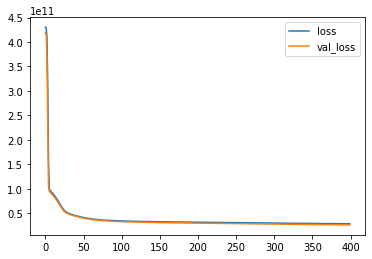

In [93]:
model_scores.plot()

- This is kind of an ideal loss results, here the train and validation score are very much intact
- Also, we dont see the difference in these scores even after high number of epcoch rounds, that means we still can continue more rounds, but we dont see much change in the loss scores

### Model predictions and evaluate the model

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [83]:
test_preds = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [95]:
# mse
mean_absolute_error(y_test, test_preds)

103412.6637972608

In [96]:
# mse
mean_squared_error(y_test, test_preds)

27628161574.2502

In [97]:
# rmse
np.sqrt(mean_squared_error(y_test, test_preds))

166217.21202766636

In [98]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [99]:
5.402966e+05

540296.6

- Here the model performance is not that great but also not that bad
- It seems the outliers kind of have a higher impact on the model performance
- Maybe we can remove the outliers, say top 1% of the higher price house and then re-train our model
- Lets see the deviation of our predictions from the true values

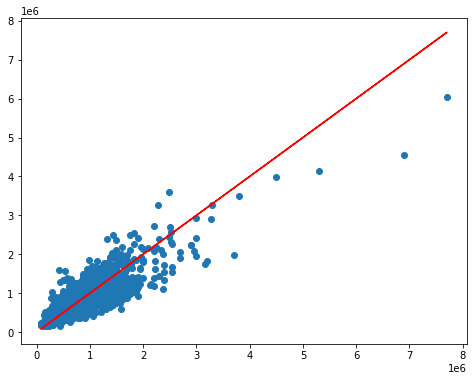

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x = y_test, y=test_preds) # our prediction vs true values
plt.plot(y_test,y_test, color = 'r') # perfect fit line
plt.show();

In [106]:
# can also check variance explaination
explained_variance_score(y_test, test_preds)

0.7919395658143646